### import libraries

In [1]:
import lenstronomy

lenstronomy.__version__

'1.9.0'

In [2]:
import numpy as np
import os
import pickle
import copy
import time
import h5py
from pprint import pprint
import joblib

import lenstronomy.Util.util as util
from lenstronomy.Workflow.fitting_sequence import FittingSequence
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
from lenstronomy.Sampling.parameters import Param
#from lenstronomy.Analysis.lens_analysis import LensAnalysis
from lenstronomy.Util import mask_util
from lenstronomy.Data.coord_transforms import Coordinates
from lenstronomy.Util.util import array2image

cwd = os.getcwd()
base_path, _ = os.path.split(cwd)
print('Base directory path:', base_path)

Base directory path: /Users/ajshajib/Research/time_delay_cosmography/J2038/WGD2038-4008/lenstronomy_modeling


In [3]:
from paperfig import *

In [4]:
import numba

In [5]:
numba.__version__

'0.51.2'

## powerlaw model

In [6]:
analyse_output = True

if analyse_output:
    job_name_out = '2038_run221_0_0_0_0_0'
    hoffman2_out = False
    input_temp = os.path.join(base_path, 'temp', job_name_out +'.txt')
    output_temp = os.path.join(base_path, 'temp', job_name_out +'_out.txt')

    if hoffman2_out is True:
        path2output_cluster = '/u/flashscratch/a/ajshajib/'+job_name_out+'_out.txt'
        os_command_output = "scp "+ssh_command+":"+path2output_cluster + " " + output_temp
        print(os_command_output)
        os.system(os_command_output)

    f = open(output_temp, 'rb')
    [input_, output_] = joblib.load(f)
    f.close()
    
    fitting_kwargs_list, multi_band_list, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params, init_samples = input_

    kwargs_result, multi_band_list_out, fit_output, _ = output_


-0.9610136467961826 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  0.9395359489960629
reduced chi^2 of data  1 =  1.0472078768592232
reduced chi^2 of data  2 =  0.8611538725876818


/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:41: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:82: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:118: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


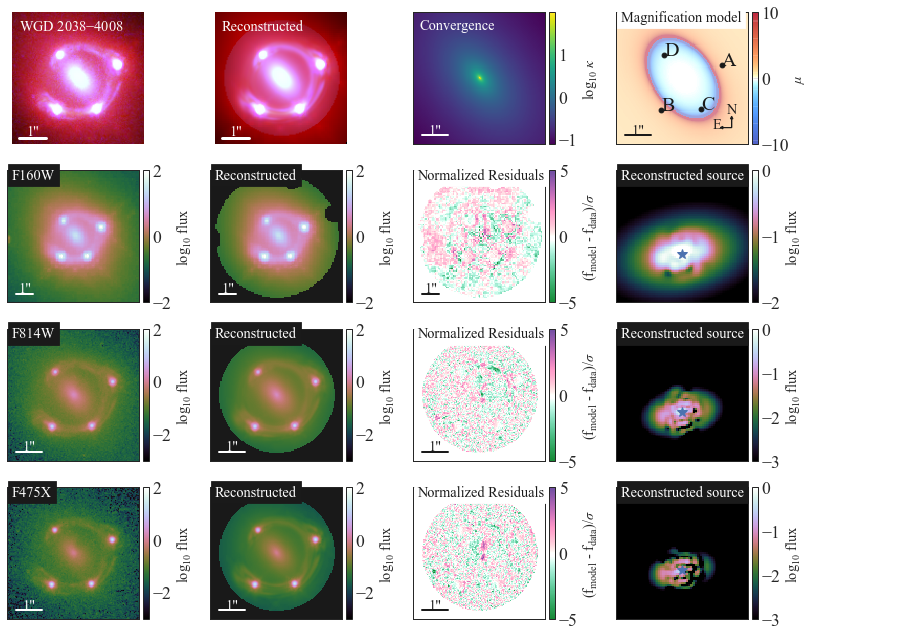

In [7]:
from rgb_functions import *

lens_plot = ModelPlot(multi_band_list_out, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string=cmap,
                    likelihood_mask_list=kwargs_likelihood['image_likelihood_mask_list'],
                    multi_band_type='multi-linear'
                    )

set_fontscale(2.)
fontsize = 2*mnras_figcaption_fontsize * 0.9

fig, axes = plt.subplots(4, 4, figsize=get_fig_size(mnras_textwidth*2, height_ratio=16./20), sharex=False, sharey=False)

lens_plot.convergence_plot(ax=axes[0, 2], no_arrow=True, band_index=0, cmap='viridis', font_size=fontsize,
                          #scale_text=""
                          )
axes[0, 2].text(0.05, 0.87, 'Convergence', color='white', fontsize=fontsize, transform=axes[0, 2].transAxes)

lens_plot.magnification_plot(ax=axes[0, 3], band_index=0, cmap=msh_cmap, colorbar_label=r"$\mu$",
                             image_name_list=['D', 'A', 'C', 'B', 'D', 'F', 'G', 'H'], font_size=fontsize)

lens_plot.data_plot(ax=axes[1, 0], band_index=2, no_arrow=True, v_max=2, v_min=-2, text='F160W', 
                    #scale_text="", 
                    font_size=fontsize)
lens_plot.data_plot(ax=axes[2, 0], band_index=0, no_arrow=True, v_max=2, v_min=-3, text='F814W',
                    #scale_text="", 
                    font_size=fontsize)
lens_plot.data_plot(ax=axes[3, 0], band_index=1, no_arrow=True, v_max=2, v_min=-3, text='F475X',
                    #scale_text="", 
                    font_size=fontsize)

lens_plot.model_plot(ax=axes[1, 1], band_index=2, no_arrow=True, v_max=2, v_min=-2, 
                     #scale_text="", 
                     font_size=fontsize)
lens_plot.model_plot(ax=axes[2, 1], band_index=0, no_arrow=True, v_max=2, v_min=-3,
                     #scale_text="", 
                     font_size=fontsize)
lens_plot.model_plot(ax=axes[3, 1], band_index=1, no_arrow=True, v_max=2, v_min=-3,
                     #scale_text="", 
                     font_size=fontsize)

lens_plot.normalized_residual_plot(ax=axes[1, 2], no_arrow=True, band_index=2, v_max=5, v_min=-5,
                                   #scale_text="", 
                                   cmap=msh_cmap2, font_size=fontsize)
lens_plot.normalized_residual_plot(ax=axes[2, 2], no_arrow=True, band_index=0, v_max=5, v_min=-5,
                                   #scale_text="", 
                                   cmap=msh_cmap2, font_size=fontsize)
lens_plot.normalized_residual_plot(ax=axes[3, 2], no_arrow=True, band_index=1, v_max=5, v_min=-5,
                                   #scale_text="", 
                                   cmap=msh_cmap2, font_size=fontsize)

lens_plot.source_plot(ax=axes[1, 3], band_index=2, center=[kwargs_result['kwargs_source'][0]['center_x'],
                                                           kwargs_result['kwargs_source'][0]['center_y']+0.4],
                      #scale_text="",
                      deltaPix_source=0.04, numPix=75, v_max=0, v_min=-2., font_size=fontsize, scale_size=1, covolve=True)
lens_plot.source_plot(ax=axes[2, 3], band_index=0,  center=[kwargs_result['kwargs_source'][0]['center_x'],
                                                           kwargs_result['kwargs_source'][0]['center_y']+0.4],
                      #scale_text="",
                      deltaPix_source=0.04, numPix=75, v_max=0, v_min=-3., font_size=fontsize, scale_size=1, convolve=True)
lens_plot.source_plot(ax=axes[3, 3], band_index=1,  center=[kwargs_result['kwargs_source'][0]['center_x'],
                                                           kwargs_result['kwargs_source'][0]['center_y']+0.4],
                      #scale_text="",
                      deltaPix_source=0.04, numPix=75, v_max=0, v_min=-3., font_size=fontsize, scale_size=1, convolve=True, )

image_data = []
reconstructed = []

for b in range(3):
    image_data.append(multi_band_list_out[b][0]['image_data'])
    reconstructed.append(lens_plot._select_band(b)._model)

image_data[0], image_data[1], image_data[2] = image_data[2], image_data[0], image_data[1] 
reconstructed[0], reconstructed[1], reconstructed[2] = reconstructed[2], reconstructed[0], reconstructed[1]

make_rgb_image(r'WGD 2038$-$4008', image_data, axes[0, 0], weights=[1., .5, .15],
               roll=[[1, 0], [-4, 1]], rollall=[[0, 0], [0, 0]], zoom=False,
               ruler_length=1, fontsize=fontsize, scale_text="1''"
              )
make_rgb_image('Reconstructed', reconstructed, axes[0, 1], weights=[1., .5, .15],
               roll=[[1, 0], [-4, 1]], rollall=[[0, 0], [0, 0]], zoom=False,
               ruler_length=1, fontsize=fontsize, scale_text="1''"
              )

#fig.tight_layout()
#fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/2038_model/figures/lenstronomy_2038_powerlaw_model.pdf', bbox_inches='tight', pad_inches = 0)

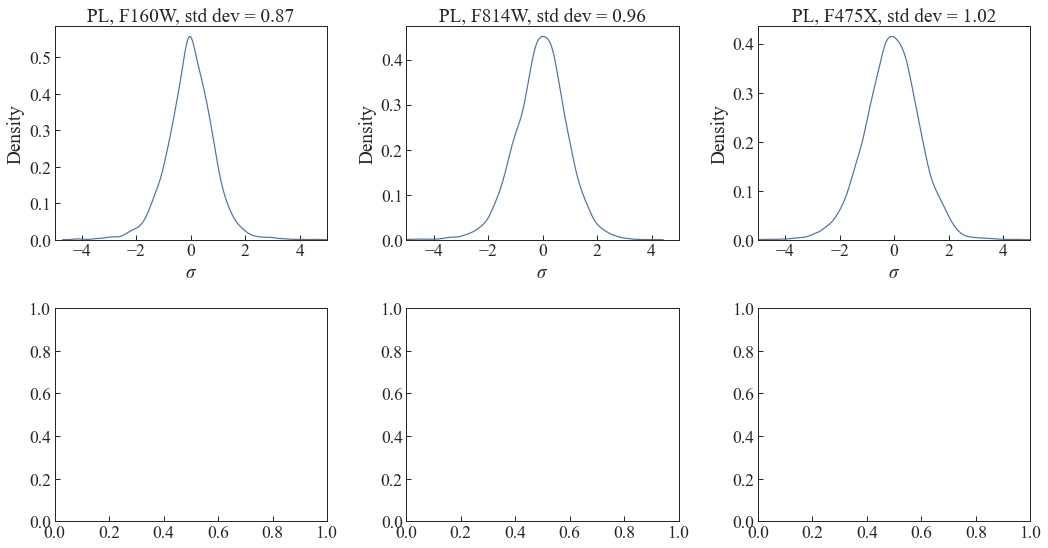

In [8]:
residual_fig, residual_axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
residual_dict  = {}

for i, band_index in enumerate([2, 0, 1]):
    sns.kdeplot(lens_plot._band_plot_list[band_index]._norm_residuals[kwargs_likelihood['image_likelihood_mask_list'][band_index] != 0],
                ax=residual_axes[0][i]
               );
    residual_axes[0][i].set_xlabel(r'$\sigma$')
    residual_axes[0][i].set_xlim(-5, 5)
    
    residual_axes[0][i].set_title('PL, {}, std dev = {:.2f}'.format(
        ['F814W', 'F475X', 'F160W'][band_index], 
        np.std(lens_plot._band_plot_list[band_index]._norm_residuals[kwargs_likelihood['image_likelihood_mask_list'][band_index] != 0])
    ))
    
    residual_dict['PL_'+['F814W', 'F475X', 'F160W'][band_index]] = lens_plot._band_plot_list[band_index]._norm_residuals[kwargs_likelihood['image_likelihood_mask_list'][band_index] != 0].flatten()
    


residual_fig.tight_layout();

In [9]:
residual_dict

{'PL_F160W': array([-1.17503355, -0.75379822, -0.16126273, ...,  0.31242877,
         0.56564063,  0.51974759]),
 'PL_F814W': array([-0.41605786,  0.22189301, -0.49591544, ..., -1.21312503,
         1.25423427,  1.26034947]),
 'PL_F475X': array([ 0.52166591,  0.70685227, -0.32417656, ..., -1.14990016,
        -1.64129816, -0.25615703])}

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


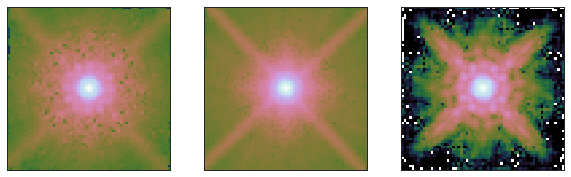

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i in range(3):
    axes[i].matshow(np.log10(multi_band_list_out[i][1]['kernel_point_source']), cmap='cubehelix', vmin=-8)
    
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
    np.savetxt('../model_posteriors/lenstronomy_pl_reconstructed_psf_{}.npy'.format(['f814w', 'f475x', 'f160w'][i]), 
               multi_band_list_out[i][1]['kernel_point_source'])


## composite model

In [11]:
# load the custom likelihood function, required for unpickling the moel output
def custom_loglikelihood_addition(kwargs_lens=None, kwargs_source=None, 
                                 kwargs_lens_light=None, kwargs_ps=None, 
                                 kwargs_special=None, kwargs_extinction=None):
    """
    Impose a Gaussian prior on the NFW scale radius R_s based on Gavazzi et al. (2007).
    """
    if kwargs_lens[0]['alpha_Rs'] < 0.:
        return -np.inf
    
    if not -0.014271818911080656-0.2 < kwargs_lens[0]['center_x'] < -0.014271818911080656+0.2:
        return -np.inf
    if not -0.020882886550870693-0.2 < kwargs_lens[0]['center_y'] < -0.020882886550870693+0.2:
        return -np.inf
    
    if not -0.5 < kwargs_lens[0]['e1'] < 0.5:
        return -np.inf
    if not -0.5 < kwargs_lens[0]['e2'] < 0.5:
        return -np.inf
            
    return 0.

-0.947536125286154 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  0.9678575578779852
reduced chi^2 of data  1 =  1.0683841795720352
reduced chi^2 of data  2 =  0.7297068845734301


/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:41: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:82: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(self._data), origin='lower',
/Users/ajshajib/Dropbox/PyCharm Projects/lenstronomy/lenstronomy/Plots/model_band_plot.py:118: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(self._model), origin='lower', vmin=v_min, vmax=v_max,


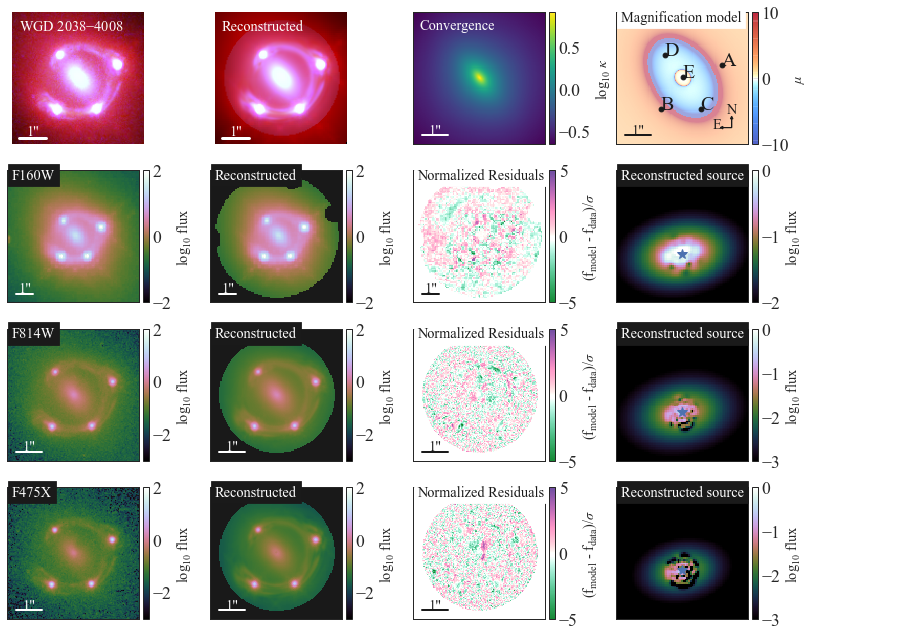

In [12]:
analyse_output = True

if analyse_output:
    job_name_out = '2038_run206_1_0_2_0_0_shortened' #job_name
    hoffman2_out = False
    input_temp = os.path.join(base_path, 'temp', job_name_out +'.txt')
    output_temp = os.path.join(base_path, 'temp', job_name_out +'_out.txt')

    if hoffman2_out is True:
        path2output_cluster = '/u/flashscratch/a/ajshajib/'+job_name_out+'_out.txt'
        os_command_output = "scp "+ssh_command+":"+path2output_cluster + " " + output_temp
        print(os_command_output)
        os.system(os_command_output)

    f = open(output_temp, 'rb')
    [input_, output_] = joblib.load(f)
    f.close()
    
    fitting_kwargs_list, multi_band_list, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params, init_samples = input_

    kwargs_result, multi_band_list_out, fit_output, _ = output_

    
kwargs_model['additional_images_list'] = [True]
from rgb_functions import *


lens_plot = ModelPlot(multi_band_list_out, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string=cmap,
                    likelihood_mask_list=kwargs_likelihood['image_likelihood_mask_list'],
                    multi_band_type='multi-linear'#, source_marg=True, linear_prior=[1e5, 1e5, 1e5]
                    )

set_fontscale(2.)
fontsize = 2*mnras_figcaption_fontsize * 0.9

fig, axes = plt.subplots(4, 4, figsize=get_fig_size(mnras_textwidth*2, height_ratio=16./20), 
                       sharex=False, sharey=False)

lens_plot.convergence_plot(ax=axes[0, 2], no_arrow=True, band_index=0, cmap='viridis', font_size=fontsize,
                           #text='Convergence'
                          #scale_text=""
                          )
lens_plot.magnification_plot(ax=axes[0, 3], band_index=0, cmap=msh_cmap, colorbar_label=r"$\mu$",
                             image_name_list=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], font_size=fontsize)

lens_plot.data_plot(ax=axes[1, 0], band_index=2, no_arrow=True, v_max=2, v_min=-2, text='F160W', 
                    #scale_text="", 
                    font_size=fontsize)
lens_plot.data_plot(ax=axes[2, 0], band_index=0, no_arrow=True, v_max=2, v_min=-3, text='F814W',
                    #scale_text="", 
                    font_size=fontsize)
axes[0, 2].text(0.05, 0.87, 'Convergence', color='white', fontsize=fontsize, transform=axes[0, 2].transAxes)

lens_plot.data_plot(ax=axes[3, 0], band_index=1, no_arrow=True, v_max=2, v_min=-3, text='F475X',
                    #scale_text="", 
                    font_size=fontsize)

lens_plot.model_plot(ax=axes[1, 1], band_index=2, no_arrow=True, v_max=2, v_min=-2, 
                     #scale_text="", 
                     font_size=fontsize)
lens_plot.model_plot(ax=axes[2, 1], band_index=0, no_arrow=True, v_max=2, v_min=-3,
                     #scale_text="", 
                     font_size=fontsize)
lens_plot.model_plot(ax=axes[3, 1], band_index=1, no_arrow=True, v_max=2, v_min=-3,
                     #scale_text="", 
                     font_size=fontsize)

lens_plot.normalized_residual_plot(ax=axes[1, 2], no_arrow=True, band_index=2, v_max=5, v_min=-5,
                                   #scale_text="", 
                                   cmap=msh_cmap2, font_size=fontsize)
lens_plot.normalized_residual_plot(ax=axes[2, 2], no_arrow=True, band_index=0, v_max=5, v_min=-5,
                                   #scale_text="", 
                                   cmap=msh_cmap2, font_size=fontsize)
lens_plot.normalized_residual_plot(ax=axes[3, 2], no_arrow=True, band_index=1, v_max=5, v_min=-5,
                                   #scale_text="", 
                                   cmap=msh_cmap2, font_size=fontsize)

lens_plot.source_plot(ax=axes[1, 3], band_index=2, center=[kwargs_result['kwargs_source'][0]['center_x'],
                                                           kwargs_result['kwargs_source'][0]['center_y']+0.4],
                      #scale_text="",
                      deltaPix_source=0.04, numPix=75, v_max=0, v_min=-2., font_size=fontsize, scale_size=1, covolve=True)
lens_plot.source_plot(ax=axes[2, 3], band_index=0,  center=[kwargs_result['kwargs_source'][0]['center_x'],
                                                           kwargs_result['kwargs_source'][0]['center_y']+0.4],
                      #scale_text="",
                      deltaPix_source=0.04, numPix=75, v_max=0, v_min=-3., font_size=fontsize, scale_size=1, convolve=True)
lens_plot.source_plot(ax=axes[3, 3], band_index=1,  center=[kwargs_result['kwargs_source'][0]['center_x'],
                                                           kwargs_result['kwargs_source'][0]['center_y']+0.4],
                      #scale_text="",
                      deltaPix_source=0.04, numPix=75, v_max=0, v_min=-3., font_size=fontsize, scale_size=1, convolve=True, )

image_data = []
reconstructed = []

for b in range(3):
    image_data.append(multi_band_list_out[b][0]['image_data'])
    reconstructed.append(lens_plot._select_band(b)._model)

image_data[0], image_data[1], image_data[2] = image_data[2], image_data[0], image_data[1] 
reconstructed[0], reconstructed[1], reconstructed[2] = reconstructed[2], reconstructed[0], reconstructed[1]

make_rgb_image(r'WGD 2038$-$4008', image_data, axes[0, 0], weights=[1., .5, .15],
               roll=[[1, 0], [-4, 1]], rollall=[[0, 0], [0, 0]], zoom=False,
               ruler_length=1, fontsize=fontsize, scale_text="1''"
              )
make_rgb_image('Reconstructed', reconstructed, axes[0, 1], weights=[1., .5, .15],
               roll=[[1, 0], [-4, 1]], rollall=[[0, 0], [0, 0]], zoom=False,
               ruler_length=1, fontsize=fontsize, scale_text="1''"
              )

#fig.tight_layout()
#fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/2038_model/figures/lenstronomy_2038_composite_model.pdf', bbox_inches='tight', pad_inches = 0)

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


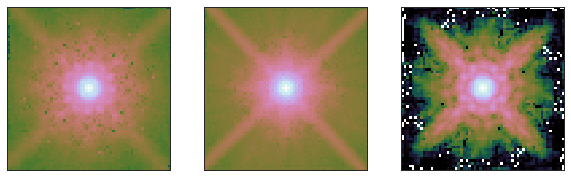

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for i in range(3):
    axes[i].matshow(np.log10(multi_band_list_out[i][1]['kernel_point_source']), cmap='cubehelix', vmin=-8)
    
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
    np.savetxt('../model_posteriors/lenstronomy_comp_reconstructed_psf_{}.npy'.format(['f814w', 'f475x', 'f160w'][i]), 
               multi_band_list_out[i][1]['kernel_point_source'])


In [14]:
for i, band_index in enumerate([2, 0, 1]):
    sns.kdeplot(lens_plot._band_plot_list[band_index]._norm_residuals[kwargs_likelihood['image_likelihood_mask_list'][band_index] != 0],
                ax=residual_axes[1][i]
               );
    residual_axes[1][i].set_xlabel(r'$\sigma$')
    residual_axes[1][i].set_xlim(-5, 5)
    
    residual_axes[1][i].set_title('Comp, {}, std dev = {:.2f}'.format(
        ['F814W', 'F475X', 'F160W'][band_index], 
        np.std(lens_plot._band_plot_list[band_index]._norm_residuals[kwargs_likelihood['image_likelihood_mask_list'][band_index] != 0])
    ))
    
    residual_dict['Comp_'+['F814W', 'F475X', 'F160W'][band_index]] = lens_plot._band_plot_list[band_index]._norm_residuals[kwargs_likelihood['image_likelihood_mask_list'][band_index] != 0].flatten()
    

residual_fig.tight_layout();

In [19]:
residual_fig.savefig('../model_posteriors/lenstronomy_2038_normres_hist.png', bbox_inches='tight')

import pickle

with open('../model_posteriors/lenstronomy_2038_normres.pickle', 'wb') as f:
    pickle.dump(residual_dict, f)